## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of Resonet 50
# Here we will be using imagenet weights
# 3 is for RGB channel

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 301s 3us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 17s 9s/step - loss: 6.2448 - accuracy: 0.3281 - val_loss: 9.9283 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 12s 6s/step - loss: 10.1508 - accuracy: 0.2969 - val_loss: 6.8724 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 15s 8s/step - loss: 4.6727 - accuracy: 0.3750 - val_loss: 9.6007 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 13s 7s/step - loss: 8.2583 - accuracy: 0.3906 - val_loss: 9.8617 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 12s 6s/step - loss: 6.5179 - accuracy: 0.3906 - val_loss: 1.5984 - val_accuracy: 0.2931
Epoch 6/50
2/2 [==============================] - 13s 7s/step - loss: 1.3849 - accuracy: 0.5625 - val_loss: 4.0576 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 16s 8s/step - loss: 4.1639 - accuracy: 0.4375

In [15]:
r.history

{'loss': [6.244781970977783,
  10.150829315185547,
  4.672701835632324,
  8.258255004882812,
  6.517916679382324,
  1.3848769664764404,
  4.163936138153076,
  4.207248210906982,
  1.8254095315933228,
  2.0741214752197266,
  1.9189190864562988,
  1.2898342609405518,
  2.3728675842285156,
  1.8069831132888794,
  0.7015506029129028,
  1.7060612440109253,
  0.6767844557762146,
  1.1422533988952637,
  0.812181830406189,
  0.8079416751861572,
  0.6453441381454468,
  0.6608415246009827,
  0.6178271174430847,
  0.4591619074344635,
  0.44407209753990173,
  0.5692502856254578,
  0.6395137906074524,
  0.3531913161277771,
  0.49146515130996704,
  0.30976903438568115,
  0.38864585757255554,
  0.30766692757606506,
  0.3784633278846741,
  0.29516303539276123,
  0.3528498411178589,
  0.2705761790275574,
  0.2626286447048187,
  0.23945915699005127,
  0.322195440530777,
  0.27077722549438477,
  0.28110653162002563,
  0.2653294503688812,
  0.23649302124977112,
  0.2650389075279236,
  0.2662224769592285,


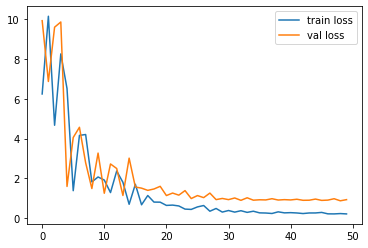

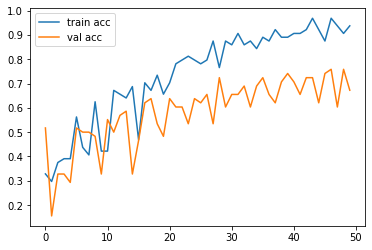

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[2.08178535e-02, 7.45759085e-02, 9.04606223e-01],
       [4.37101364e-01, 2.49032900e-01, 3.13865781e-01],
       [4.31954255e-03, 8.84742737e-01, 1.10937744e-01],
       [4.28627199e-03, 7.09768713e-01, 2.85944998e-01],
       [2.17880264e-01, 4.55907017e-01, 3.26212734e-01],
       [6.55095130e-02, 5.06316032e-03, 9.29427385e-01],
       [1.46070048e-01, 7.54705250e-01, 9.92246568e-02],
       [1.24943376e-01, 4.06377494e-01, 4.68679100e-01],
       [2.58040818e-05, 1.19387201e-04, 9.99854803e-01],
       [2.46374398e-01, 3.65096033e-01, 3.88529509e-01],
       [3.89417298e-02, 9.43062007e-01, 1.79961976e-02],
       [9.59164798e-01, 3.13868821e-02, 9.44831222e-03],
       [3.96576058e-03, 9.92188454e-01, 3.84583720e-03],
       [1.29759118e-01, 6.10653341e-01, 2.59587556e-01],
       [3.00843209e-01, 9.94322300e-02, 5.99724591e-01],
       [5.29050082e-02, 6.98964834e-01, 2.48130172e-01],
       [4.26943377e-02, 9.09707367e-01, 4.75982316e-02],
       [1.24434172e-03, 9.76791

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

In [29]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [31]:
x.shape

(224, 224, 3)

In [33]:
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [32]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[0.03955092, 0.01039395, 0.9500552 ]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:
a==1

array([False])